# LEVEL 3 TASK

# Credit Card Fraud Detection

• Develop a machine learning model designed to detect fraudulent credit card
transactions.

• The process involves preprocessing and normalizing transaction data,
addressing class imbalance concerns, and partitioning the dataset into training
and testing subsets.

• Train a classification algorithm—like logistic regression or random forests—to
differentiate between fraudulent and legitimate transactions.

• Assess the model's efficacy using metrics such as precision, recall, and F1-score.

• Additionally, explore strategies like oversampling or undersampling to enhance
outcomes and refine the model's performance.

In [1]:
# Pandas Library for Dataframe
import pandas as pd

# Numpy Library for Numerical Calculations
import numpy as np

# Matplotlib and Seaborn for Plottings
import matplotlib.pyplot as plt
import seaborn as sns

# Pickle Library for Saving the Model
import pickle

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# KFold and Cross_Val_Score for Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Logistic Regression, Decision Tree, K Neighbors, Naive Bayes, SVC and Linear Discriminant are Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Accuracy Score, Classification Report and Confusion Matrix is for Analysis of Models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Data Pre-processing

In [5]:

# Data Analysis
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

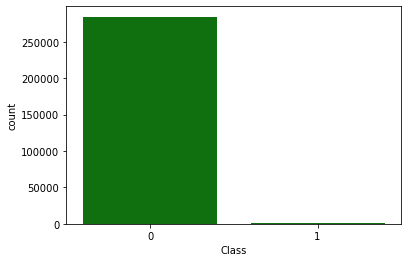

In [11]:
#Data Visualization
sns.countplot(x='Class',data=df,color='green')

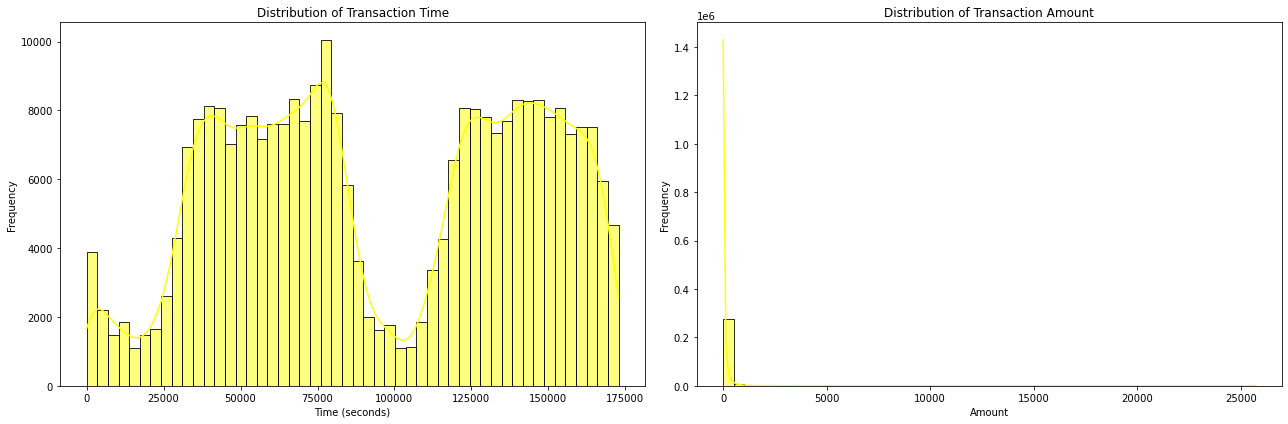

In [12]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram for 'Time' feature
sns.histplot(df['Time'], bins=50, ax=ax[0], kde=True, color='yellow')
ax[0].set_title('Distribution of Transaction Time')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Frequency')

# Histogram for 'Amount' feature
sns.histplot(df['Amount'], bins=50, ax=ax[1], kde=True,color='yellow')
ax[1].set_title('Distribution of Transaction Amount')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

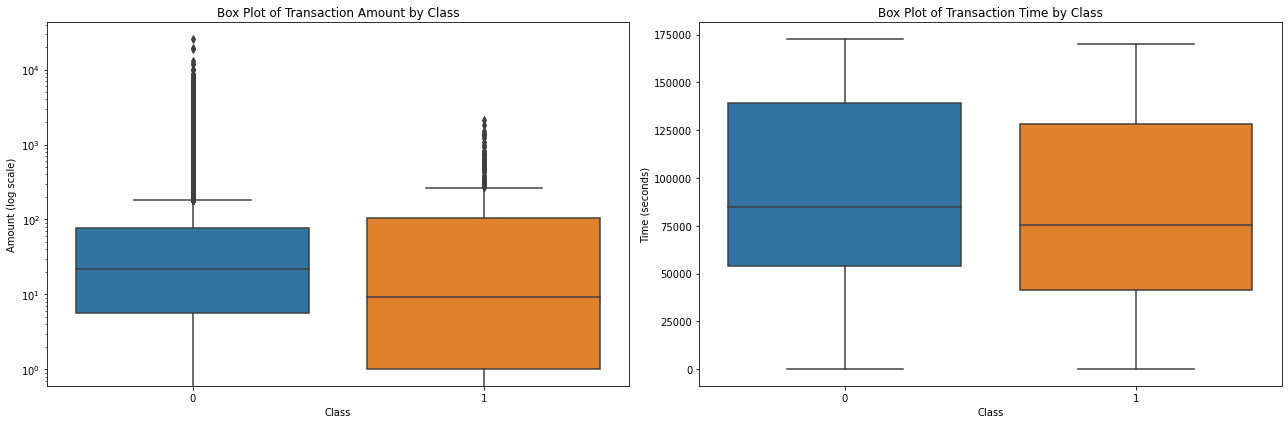

In [13]:
# Creating subplots for box plots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for 'Amount' by 'Class'
sns.boxplot(x='Class', y='Amount', data=df, ax=ax[0])
ax[0].set_title('Box Plot of Transaction Amount by Class')
ax[0].set_yscale('log')  # Using log scale due to wide range of 'Amount'
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Amount (log scale)')

# Box plot for 'Time' by 'Class'
sns.boxplot(x='Class', y='Time', data=df, ax=ax[1])
ax[1].set_title('Box Plot of Transaction Time by Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Time (seconds)')

# Adjust layout
plt.tight_layout()
plt.show()
     


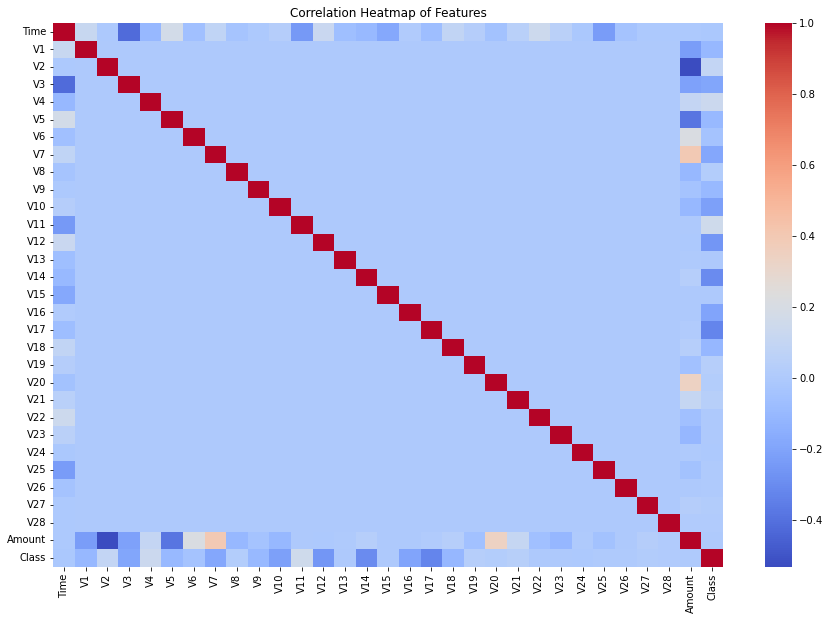

In [14]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".1f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [15]:
#Input and Output separation
x=df.drop(['Class'],axis=1).values
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [16]:

y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
#Train Test Splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [18]:
x_train

array([[ 2.10500000e+03, -2.28956540e+00, -4.80259812e-01, ...,
         3.92241265e-01, -1.47756654e-01,  1.00000000e+00],
       [ 1.53702000e+05, -3.13716788e-01, -4.06434174e+00, ...,
        -2.90331333e-01,  1.10360002e-01,  1.19428000e+03],
       [ 9.72830000e+04, -1.80976314e+00, -5.67439077e-01, ...,
        -6.23851804e-02,  8.80786484e-02,  7.50000000e+01],
       ...,
       [ 7.97950000e+04, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01,  3.94000000e+00],
       [ 8.79310000e+04, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01,  1.00000000e+00],
       [ 7.63810000e+04,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  1.13000000e+02]])

In [19]:
x_test

array([[ 4.15050000e+04, -1.65265066e+01,  8.58497180e+00, ...,
        -2.01857525e+00, -1.04280417e+00,  3.64190000e+02],
       [ 4.42610000e+04,  3.39812064e-01, -2.74374524e+00, ...,
         4.09958027e-02,  1.02037825e-01,  5.20120000e+02],
       [ 3.54840000e+04,  1.39959027e+00, -5.90701288e-01, ...,
         1.14086454e-02,  4.63414166e-03,  3.10000000e+01],
       ...,
       [ 3.19110000e+04,  7.46799847e-01, -1.02805270e+00, ...,
         5.83524526e-02,  5.84408571e-02,  1.95600000e+02],
       [ 1.41043000e+05,  2.08054684e+00,  1.67779737e-01, ...,
        -6.18870326e-02, -3.09104732e-02,  8.90000000e-01],
       [ 6.11910000e+04,  1.09163749e+00, -6.80472044e-02, ...,
         8.01353988e-02,  3.54418649e-02,  1.00000000e+01]])

In [20]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [23]:
x_train

array([[-1.95144063, -1.16681856, -0.28654908, ...,  0.96676   ,
        -0.4486209 , -0.33974783],
       [ 1.24181171, -0.15922175, -2.43543667, ..., -0.71311931,
         0.33519183,  4.27773998],
       [ 0.05339701, -0.92214029, -0.33881865, ..., -0.15212107,
         0.26753092, -0.0533992 ],
       ...,
       [-0.31497174, -0.07400401,  0.59673261, ..., -0.29672056,
        -0.59571272, -0.32837128],
       [-0.14359433, -1.50291696,  1.41328113, ...,  1.2243654 ,
         1.01984233, -0.33974783],
       [-0.38688453,  0.62962541, -0.46917078, ...,  0.0044092 ,
         0.11724428,  0.09364469]])

In [24]:
x_test

array([[-1.12504955, -8.46213366,  5.32241494, ..., -5.08436988,
        -3.14225814,  1.20613425],
       [-1.06705305,  0.1721782 , -1.70548891, ...,  0.09981431,
         0.30730066,  1.88536446],
       [-1.2517538 ,  0.71470652, -0.36982258, ...,  0.02533993,
         0.01381061, -0.24523952],
       ...,
       [-1.32694302,  0.38052595, -0.64113871, ...,  0.14350305,
         0.17593729,  0.47175716],
       [ 0.96960044,  1.06330609,  0.10071011, ..., -0.15915397,
        -0.09328997, -0.37639852],
       [-0.71078284,  0.5570574 , -0.04558793, ...,  0.1983333 ,
         0.10663831, -0.33671541]])

# Logistic Regression Model Creation

Hyperparameter Tunning

In [25]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
model =Pipeline([
        ('sampling', SMOTE()),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

In [27]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [28]:
param_distribs = {'classifier__penalty': ['l2'],
                        'classifier__C': [0.01, 0.1, 1.0, 10, 100, 1000],
                   'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [29]:
param_distribs

{'classifier__penalty': ['l2'],
 'classifier__C': [0.01, 0.1, 1.0, 10, 100, 1000],
 'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rnd_search = RandomizedSearchCV(estimator=model, param_distributions=param_distribs, n_jobs=-1, cv=5, scoring='balanced_accuracy',error_score=0, n_iter=4)
     

In [31]:
rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=0,
                   estimator=Pipeline(steps=[('sampling', SMOTE()),
                                             ('classifier',
                                              LogisticRegression(max_iter=1000))]),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'classifier__C': [0.01, 0.1, 1.0, 10,
                                                          100, 1000],
                                        'classifier__penalty': ['l2'],
                                        'classifier__solver': ['newton-cg',
                                                               'lbfgs',
                                                               'liblinear']},
                   scoring='balanced_accuracy')

In [32]:
print("Best: %f using %s" % (rnd_search.best_score_, rnd_search.best_params_))

Best: 0.932970 using {'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__C': 0.01}


In [33]:

final_model = rnd_search.best_estimator_
y_pred = final_model.predict(x_test)

In [34]:
#performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred,labels=final_model.classes_)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9728473953395831
Confusion Matrix:
 [[82997  2310]
 [   10   126]]


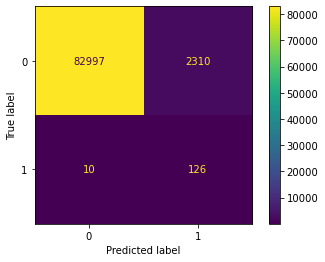

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=final_model.classes_)

disp.plot()

plt.show()
     

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

